# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rosyid Hassan
- **Email:** rosyidhassan@gmail.com
- **ID Dicoding:** rosyidhassan

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penggunaan sepeda di musim-musim yang berbeda?
- Berapa banyak sepeda yang digunakan pada hari-hari kerja dibandingkan dengan hari libur?
- jumlah pengguna dari bulan ke bulan
- berepa perbandigan pengguna terdaftar dan tidak terdaftar

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#memuat data day
day="data/day.csv"
day_df = pd.read_csv(day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#memuat data hour
hour="data/hour.csv"
hour_df = pd.read_csv(hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- memmuat data day dan hour

### Assessing Data

In [4]:
#menilai data day
day_df.info()#melihat tipe kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()#memeriksa parameter statistik

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.isna().sum()#melihat apakah ada data kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()#melihat apakah ada data duplikat

np.int64(0)

In [8]:
#menilai data hour
hour_df.info()#melihat tipe kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()#memeriksa parameter statistik

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.isna().sum()#melihat apakah ada data kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.duplicated().sum()#melihat apakah ada data duplikat

np.int64(0)

**Insight:**
dari penilian yang sudah saya lakukan dari kedua data tersebut tidak ada keselaha pada rentang data,tidak ada data kosong,dan duplikat 
tetapi kedua data meliki kesalahan sedikit pada kolom dteday yaitu mengunakan tipe data object yang seharusnya datetime

### Cleaning Data

In [26]:
#merubah tipe data kolom dteday yang sebelumnya obejct menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

day_df.to_csv('day_clean.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [27]:
#merubah tipe data kolom dteday yang sebelumnya obejct menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()
hour_df.to_csv('hour_clean.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
tipe data sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore Data day

In [14]:
# distribusi penggunaan sepeda di musim-musim yang berbeda
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season'] = day_df['season'].map(season_mapping)
day_df.groupby(by="season").agg({
    "casual": "sum",         # Total pengguna casual
    "registered": "sum",     # Total pengguna terdaftar
    "cnt": "sum"             # Total penggunaan sepeda (casual + registered)
})


,casual,registered,cnt
season,,,
fall,226091,835038,1061129
spring,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


In [15]:
#perbadingan hari kerja dan hari libur
workingday_mapping = {0: 'holidays', 1: 'working days'}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)
day_df.groupby(by="workingday").agg({
    "casual": "sum",         # Total pengguna casual
    "registered": "sum",     # Total pengguna terdaftar
    "cnt": "sum"             # Total penggunaan sepeda (casual + registered)
})


,casual,registered,cnt
workingday,,,
holidays,316732,683537,1000269
working days,303285,1989125,2292410


### Explore Data day

In [16]:
#melihat pengguna dari tahun ke tahun
yearly_mapping = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].map(yearly_mapping)
day_df.groupby(by="yr").agg({
    "casual": "sum",         # Total casual users
    "registered": "sum",     # Total registered users
    "cnt": "sum"             # Total bike usage (casual + registered)
})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


### Explore Data hour

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkanstatistik di atas, kitamemperoleh informasi jumlah pelanggan sebanyak 17379,data yang ditampilkan range antara jam 00.00 sampai 23.59, memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54

In [18]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hr").agg({
    "casual": "sum",         # Total casual users
    "registered": "sum",     # Total registered users
    "cnt": "sum"             # Total bike usage (casual + registered)
})

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


**Insight:**
dari eda yang saya lakukan saya mempunyai informasi bahwa jam paling ramai pada 17.00,penguna dari tahun 2011 ke 2012 meningkat ,musim paling ramai peminjaman pada fall,dan peminjaman ramai pada hari kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:- Bagaimana distribusi penggunaan sepeda di musim-musim yang berbeda?


C:\Users\MINUS4JUTA\AppData\Local\Temp\ipykernel_11440\4044195655.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


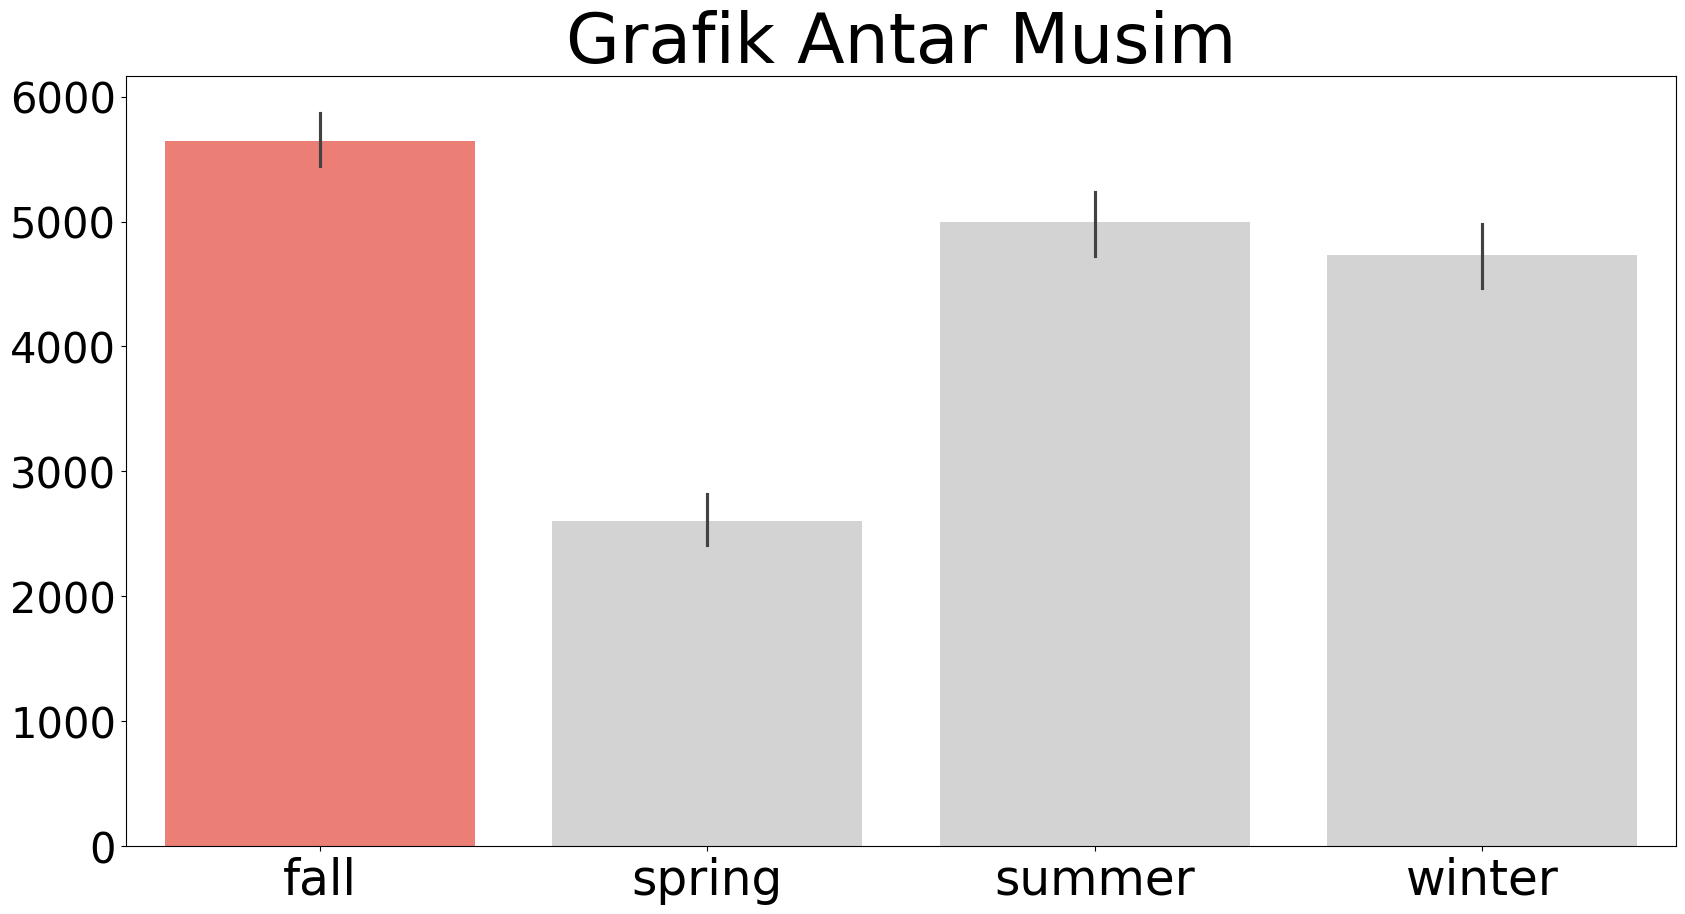

In [19]:
# Mengatur warna dasar abu-abu untuk semua bar
colors = ["#D3D3D3"] * 4

# Menghitung total 'cnt' untuk setiap musim dan menemukan musim dengan nilai terbesar
season_totals = day_df.groupby("season")["cnt"].sum()

# Cari musim dengan penggunaan sepeda terbesar
max_season = season_totals.idxmax()

# Daftar urutan musim untuk penyesuaian warna
season_order = season_totals.index.tolist()  # Urutkan berdasarkan musim yang ada

# Terapkan warna mencolok pada musim dengan penggunaan terbesar
colors[season_order.index(max_season)] = "#FF6F61"  # Warna mencolok untuk musim dengan nilai terbesar

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="cnt" dan x="season", menggunakan data=day_df
sns.barplot(
    y="cnt", 
    x="season",
    data=day_df,
    order=season_order,   # Sesuaikan urutan musim
    palette=colors,       # Terapkan palet warna
    ax=ax
)

# Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()


### Pertanyaan 2:- Berapa banyak sepeda yang digunakan pada hari-hari kerja dibandingkan dengan hari libur?


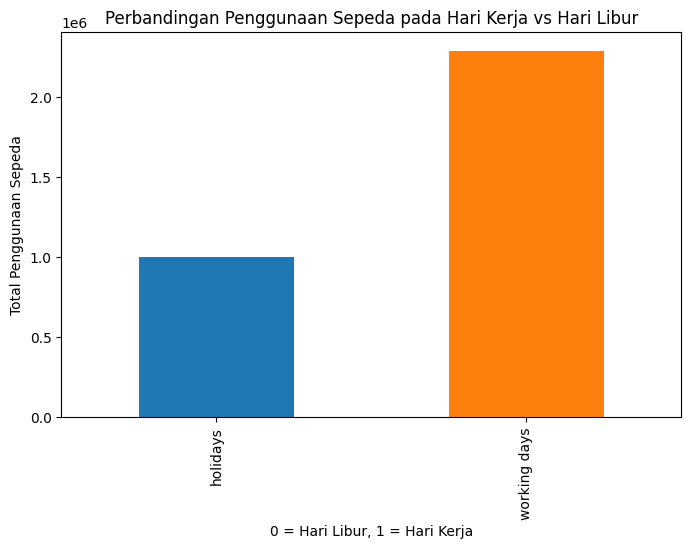

In [20]:
# menhtung jumlan pengguna pada hari libur dan kerja
working_vs_holiday = day_df.groupby('workingday')['cnt'].sum()

#membuat bar chart unutuk membandingakan hari libur dan kerja
plt.figure(figsize=(8, 5))
working_vs_holiday.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# memberikan label dan judul
plt.xlabel('0 = Hari Libur, 1 = Hari Kerja')
plt.ylabel('Total Penggunaan Sepeda')
plt.title('Perbandingan Penggunaan Sepeda pada Hari Kerja vs Hari Libur')

# menampilkan plot
plt.show()

### Pertanyaan 3:jumlah pengguna dari bulan ke bulan


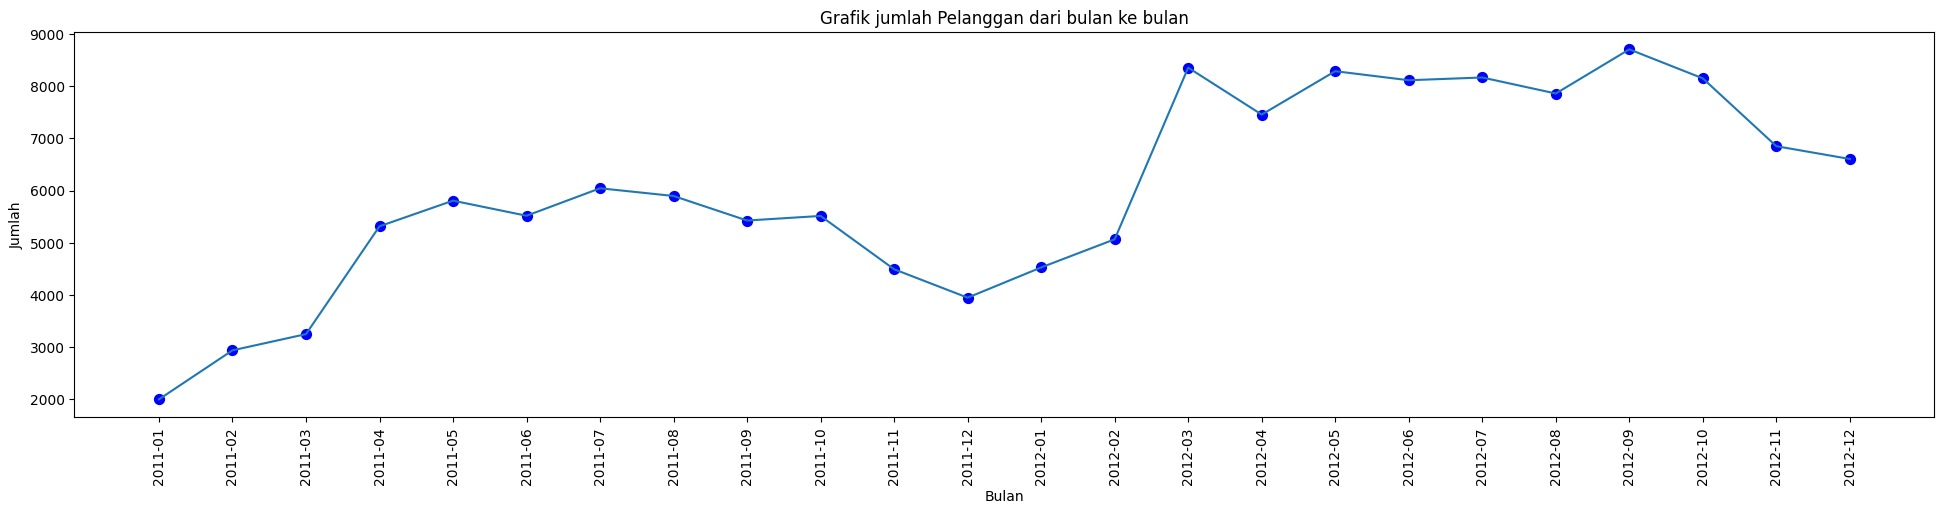

In [21]:
mnth_counts = day_df.groupby(day_df['dteday'].dt.to_period('M'))['cnt'].max()

# membuat figure (24, 5)
plt.figure(figsize=(24, 5))

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan
plt.scatter(mnth_counts.index.astype(str), mnth_counts.values, c="#0000FF", s=50, marker='o')

# membuat plot garis untuk jumlah pelanggan maksimum per bulan
plt.plot(mnth_counts.index.astype(str), mnth_counts.values)

# menambah labels dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik jumlah Pelanggan dari bulan ke bulan')

# menmpilkan plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Pertanyaan 4:- berepa perbandigan pengguna terdaftar dan tidak terdaftar

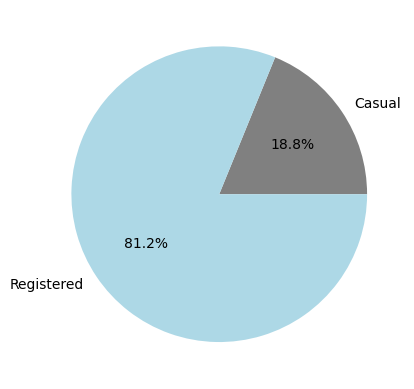

In [22]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#808080", "#ADD8E6"])

# Menampilkan pie plot
plt.show()

## Conclusion

- Conclution pertanyaan 1 musim pengguna paling banyak pada musim fall
- Conclution pertanyaan 2 Jumlah pengguna sepeda pada hari kerja lebih besar dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh pengguna sepeda yang memanfaatkan alat transportasi ini untuk keperluan sehari-hari seperti bekerja atau sekolah.
- Conclution pertanyaan 3 Kita dapat melihat fluktuasi pada jumlah pelanggan maksimum tiap bulannya.ini menunjukkan pola penggunaan yang kemungkinan terkait dengan faktor musiman atau tren bulanan.
- Conclution pertanyaan 4  jumlah registered sebanyak 81.2% sedangkan yang belum melakukan regsitered (casual) sebanyak 18.8%

## Analisis Lanjutan (Opsional)

Analisis Korelasi Cuaca

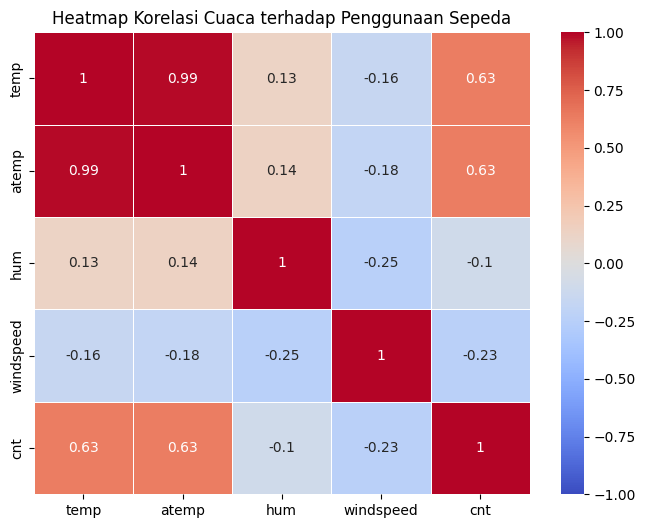

In [23]:
weather_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
weather_data = day_df[weather_columns]

# Hitung matriks korelasi
correlation_matrix = weather_data.corr()

# Buat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Beri judul pada heatmap
plt.title('Heatmap Korelasi Cuaca terhadap Penggunaan Sepeda')
plt.show()

berdasarkan heatmap korelasi yang ditampilkan, berikut adalah kesimpulan korelasi antara faktor cuaca dengan penggunaan sepeda:

temp dan cnt:
Korelasi positif moderat (0.63). Semakin tinggi suhu, semakin banyak penggunaan sepeda.

atemp dan cnt:
Korelasi positif moderat (0.63). atemp juga memengaruhi jumlah penggunaan sepeda hampir sama dengan suhu aktual.

hum  dan cnt:
Korelasi negatif lemah (-0.1). Kelembaban cenderung memiliki pengaruh negatif kecil terhadap penggunaan sepeda.

windspeed  dan cnt:
Korelasi negatif moderat (-0.23). Kecepatan angin yang lebih tinggi cenderung mengurangi penggunaan sepeda.

Dari korelasi ini, dapat disimpulkan bahwa suhu (baik suhu aktual maupun suhu atemp) memiliki pengaruh positif yang signifikan terhadap penggunaan sepeda, sedangkan kecepatan angin menunjukkan pengaruh negatif yang cukup kuat. Kelembaban memiliki dampak yang relatif lebih kecil.

## Analisis clustering

In [30]:
# Mengelompokkan berdasarkan 'weathersit' dan menghitung jumlah total pengguna sepeda
weathersit_usage = hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)
# Mapping kode weathersit ke deskripsi cuaca
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)
# Menampilkan hasil penggunaan sepeda berdasarkan kondisi cuaca
print(weathersit_usage)

weathersit
Clear         2338173
Mist           795952
Light Snow     158331
Heavy Rain        223
Name: cnt, dtype: int64


In [32]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
Frequency (banyaknya pelanggan dalam berinteraksi)
Monetary (banyaknya uang yang mereka gunakan)